In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import AutoProcessor, AutoModel
import torch,cairosvg,io

model = AutoModel.from_pretrained("/media/qba/Data/Project/DeepLearning/Model/siglip-so400m",device_map="auto")
processor = AutoProcessor.from_pretrained("/media/qba/Data/Project/DeepLearning/Model/siglip-so400m")



2025-03-07 13:35:15.450966: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 13:35:15.465357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741325715.474669  205924 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741325715.478984  205924 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 13:35:15.489870: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

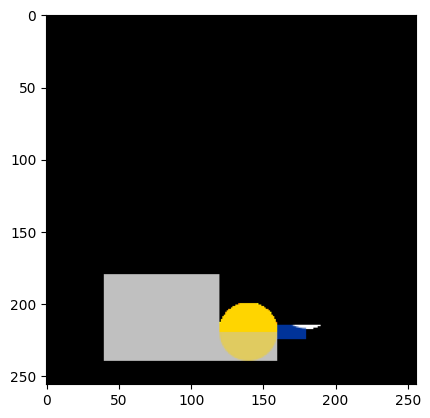

In [8]:
svg1 = b"""
  <svg viewBox="0 0 256 256" width="256" height="256">
    <!-- Define the gradient for the corduroy texture -->
    <defs>
      <linearGradient id="corduroyGradient" x1="0%" y1="0%" x2="100%" y2="100%">
        <stop offset="0%" stop-color="rgb(255, 69, 0)" />
        <stop offset="50%" stop-color="rgb(255, 140, 0)" />
        <stop offset="100%" stop-color="rgb(255, 69, 0)" />
      </linearGradient>
    </defs>

    <!-- Jacket body -->
    <path d="M50,50 Q80,10 150,10 Q220,10 250,50 C220,80 150,110 80,110 Q50,80 20,50 50,20 L20,50 Q50,80 80,110 C150,110 220,80 250,50 Z" fill="url(#corduroyGradient)" stroke="rgb(255, 140, 0)" stroke-width="2" />

    <!-- Collar -->
    <path d="M70,80 Q100,60 130,80 C100,100 70,120 70,80 Z" fill="rgb(255, 130, 0)" stroke="rgb(255, 140, 0)" stroke-width="2" />

    <!-- Button -->
    <circle cx="115" cy="135" r="5" fill="rgb(255, 140, 0)" />

    <!-- Details and adjustments -->
    <line x1="50" y1="50" x2="80" y2="10" stroke="rgb(255, 140, 0)" stroke-width="2" />
    <line x1="220" y1="50" x2="250" y2="10" stroke="rgb(255, 140, 0)" stroke-width="2" />
  </svg>
"""
svg2 = b"""
<svg viewBox="0 0 256 256" width="256" height="256">
  <!-- Podium -->
  <rect x="40" y="180" width="80" height="40" fill="#C0C0C0"/>
  <rect x="40" y="220" width="40" height="20" fill="#C0C0C0"/>
  <rect x="80" y="220" width="40" height="20" fill="#C0C0C0"/>
  <rect x="120" y="220" width="40" height="20" fill="#C0C0C0"/>

  <!-- Goose -->
  <path d="M160 200 Q 170 180 180 160 Q 190 140 200 120 Q 210 100 220 80 Q 230 60 240 40 Q 250 20 260 0" fill="#B26622" stroke="black" stroke-width="2"/>

  <!-- Medal -->
  <g transform="translate(140, 220)">
    <circle cx="0" cy="0" r="20" fill="gold" fill-opacity="0.5"/>
    <path d="M165 190 A 50 50 0 0 1 190 200 A 50 50 0 0 1 165 190" fill="white" fill-opacity="0.9"/>
  </g>

  <!-- Flag -->
  <rect x="160" y="215" width="20" height="10" fill="#003399"/>
  <path d="M170 215 Q 180 220 190 215" fill="white"/>
</svg>
"""
texts = ["SVG illustration of "+"a goose winning a gold medal"]
img = cairosvg.svg2png(svg2)
img = Image.open(io.BytesIO(img))
img = img.convert('RGB')
plt.imshow(img)

In [9]:

inputs = processor(text=texts, images=img, padding="max_length", return_tensors="pt").to("cuda")

with torch.no_grad():
    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
probs = torch.sigmoid(logits_per_image) # these are the probabilities
print(f"{probs[0][0]:.1%} that image 0 is '{texts[0]}'")

0.0% that image 0 is 'SVG illustration of a goose winning a gold medal'
